# Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datasets

### Downloading Data

**Warning:** since Scikit-Learn 0.24, `fetch_openml()` returns a Pandas `DataFrame` by default. To avoid this and keep the same code as in the book, we use `as_frame=False`.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

c:\Users\Martin Biber\Dropbox\pythonvenv\DataScience\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
df_mnist = pd.DataFrame(mnist.data, columns=mnist.feature_names)
df_mnist['target'] = mnist.target

In [9]:
df_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [11]:
df_mnist.to_csv('./data/mnist.csv', index=False)

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df_iris.to_csv('./data/iris.csv', index=False)

### Load Data from downloaded File

In [3]:
df_mnist = pd.read_csv('./data/mnist.csv')
df_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [49]:
df_iris = pd.read_csv('./data/iris.csv')
df_iris_feature_names = df_iris.columns[:-1].to_list()
print(df_iris_feature_names)
df_iris.head()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
df_iris_class_names = df_iris['target'].value_counts().index.astype('str').to_list()
df_iris_class_names

['0', '1', '2']

## Binary Classifier

In [23]:
df_mnist.iloc[:,:-1].head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X, y = df_mnist.iloc[:, :-1].values, df_mnist.iloc[:, -1:].values.squeeze() #without squeeze we get (70'000, 1)
print('Numpy: \nshape X', X.shape, ' \nshape y:', y.shape)

Numpy: 
shape X (70000, 784)  
shape y: (70000,)


In [53]:
some_digit = X[0]
print(type(some_digit))
y[0]

<class 'numpy.ndarray'>


5

In [42]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [44]:
y_train_5 = (y_train == 5) # () are only used for readability, code would work without them
y_test_5 = (y_test == 5)

In [45]:
y_train_5[:5]

array([ True, False, False, False, False])

**Note**: some hyperparameters will have a different defaut value in future versions of Scikit-Learn, such as `max_iter` and `tol`. To be future-proof, we explicitly set these hyperparameters to their future default values. For simplicity, this is not shown in the book.

In [46]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [58]:
sgd_clf.predict([some_digit]) # [] turns the array into a class list (I thought it would be a matrix); sgd_clf.predict(X_test) is used to predict the whole matrix

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

### Cross-Validation using Stratified-k-fold

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


### Confusion Matrix

In [61]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Calculate confusion matrix (SKLEARN Style)

TN | FP \
FN | TP

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Calculate confusion matrix (like I learnt it)

TP | FP \
FN | TN

We need np.flip() and change the order of the arguments to do that

In [64]:
np.flip(confusion_matrix(y_train_pred, y_train_5))

array([[ 3530,   687],
       [ 1891, 53892]], dtype=int64)

### Precision Recall f1

In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [69]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [70]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Precision / Recall Trade off

According to the book page 94


sklearn doesn't allow to calculated the probability. A score is calculated and used to calculate ROC and AUC

In [71]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [72]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [73]:
y_some_digit_pred

array([ True])

In [74]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [75]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [76]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

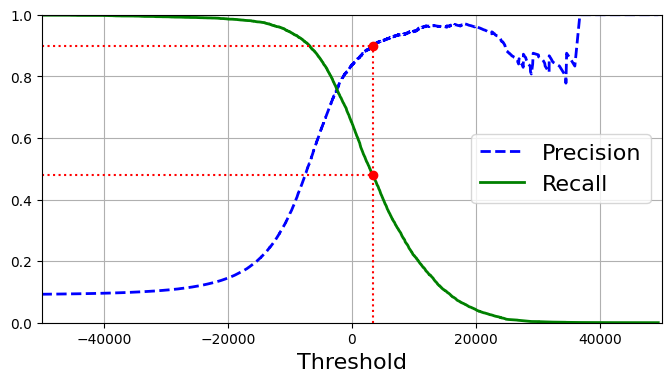

In [78]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [79]:
(y_train_pred == (y_scores > 0)).all()

True

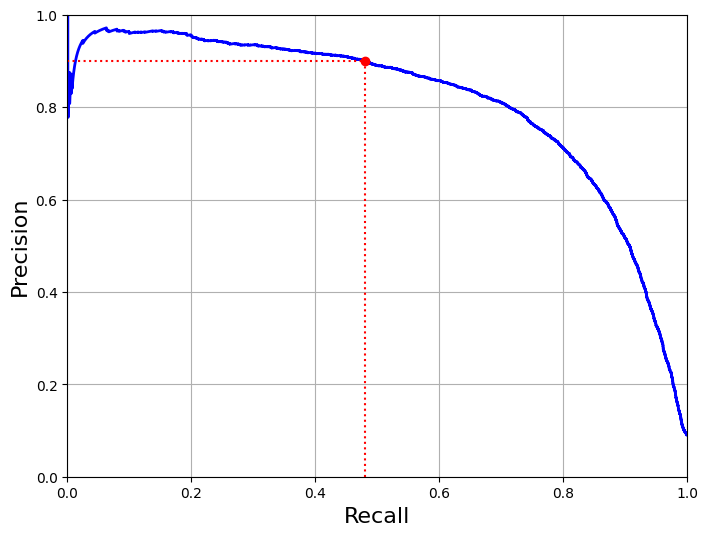

In [80]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [81]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [82]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [83]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### The ROC Curve

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

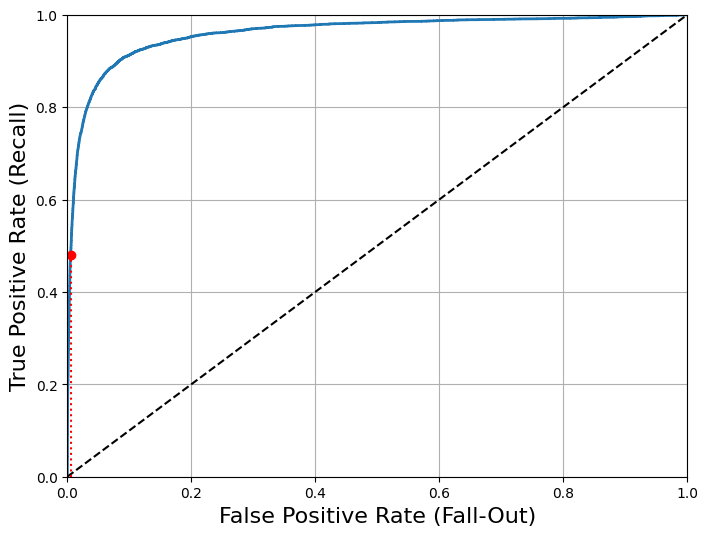

In [85]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [86]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Same calculation with RandomForestClassifier

**Note**: we set `n_estimators=100` to be future-proof since this will be the default value in Scikit-Learn 0.22.

In [87]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [88]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [89]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

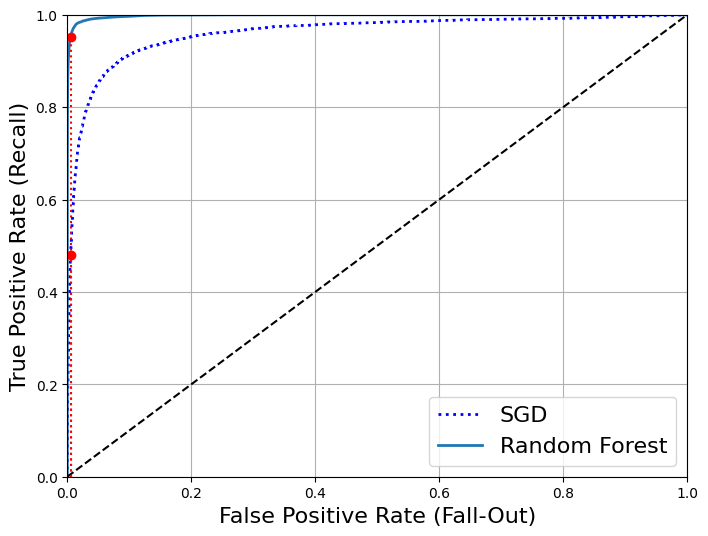

In [90]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [92]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [93]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

### Decision Trees

In [18]:
df_iris['target'].value_counts().index.tolist()

[0, 1, 2]

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_13772\554365598.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


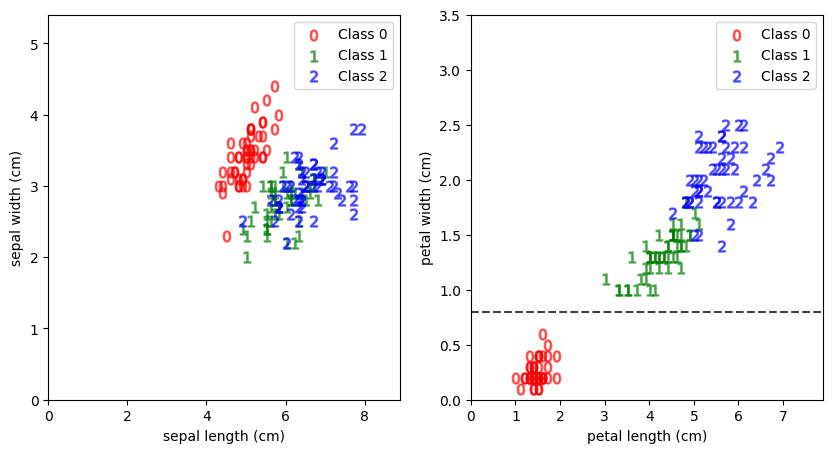

In [19]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig, axs = plt.subplots(1, 2, figsize=(10, 5));

h_label = 'sepal length (cm)'
v_label = 'sepal width (cm)'

for c in df_iris['target'].value_counts().index.tolist():
    df_iris[
        df_iris['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha=0.5,
        label=f'Class {c}',
        ax=axs[0],
    )
    
axs[0].set_xlim(0, df_iris[h_label].max() + 1)
axs[0].set_ylim(0, df_iris[v_label].max() + 1)

h_label = 'petal length (cm)'
v_label = 'petal width (cm)'

for c in df_iris['target'].value_counts().index.tolist():
    df_iris[
        df_iris['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha=0.5,
        label=f'Class {c}',
        ax=axs[1],
    )
    
axs[1].set_xlim(0, df_iris[h_label].max() + 1)
axs[1].set_ylim(0, df_iris[v_label].max() + 1)

axs[1].axhline(y=0.8, color='black', linestyle='--', alpha=0.75)

axs[0].legend()
axs[1].legend()
    
fig.show()

In [20]:
df_iris['petal length x width (cm)'] = df_iris['petal length (cm)'] * df_iris['petal width (cm)']
df_iris['sepal length x width (cm)'] = df_iris['sepal length (cm)'] * df_iris['sepal width (cm)']

df_iris['petal length x sepal length (cm)'] = df_iris['petal length (cm)'] * df_iris['sepal length (cm)']
df_iris['petal width x sepal width (cm)'] = df_iris['petal width (cm)'] * df_iris['sepal width (cm)']

C:\Users\Martin Biber\AppData\Local\Temp\ipykernel_13772\3035703862.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


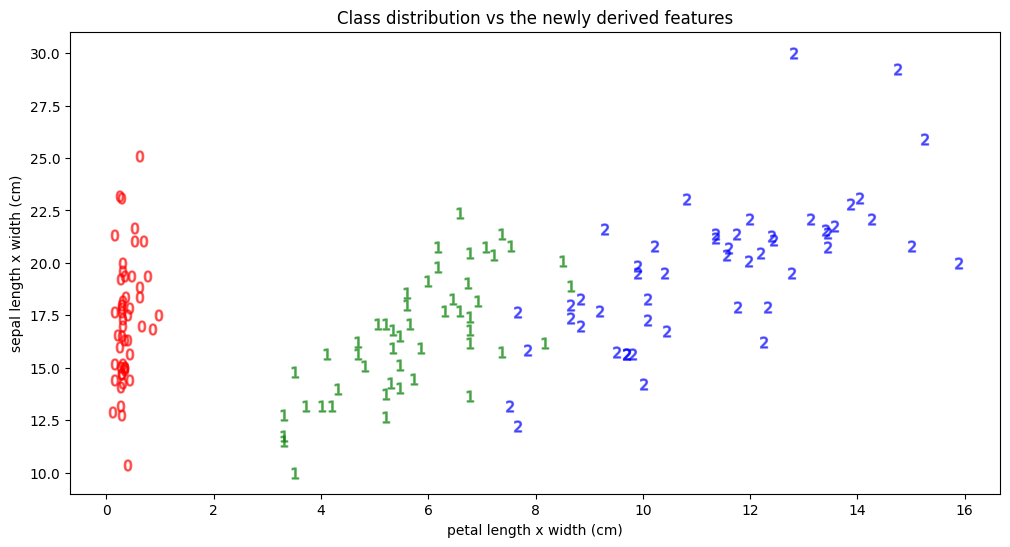

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df_iris['target'].value_counts().index.tolist():
    df_iris[
        df_iris['target'] == c
    ].plot(
        title='Class distribution vs the newly derived features',
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha=0.5,
        ax=ax,
    )
    
# ax.set_xlim(0, df[h_label].max() + 1)
# ax.set_ylim(0, df[v_label].max() + 1)
    
fig.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train, df_test = train_test_split(df_iris, test_size=0.3, random_state=13)

In [24]:
print(df_iris.shape[0], df_train.shape[0], df_test.shape[0])
print(df_train.columns)

150 105 45
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'petal length x width (cm)',
       'sepal length x width (cm)', 'petal length x sepal length (cm)',
       'petal width x sepal width (cm)'],
      dtype='object')


In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [26]:
x_train = df_train[df_iris_feature_names]
x_test  = df_test[df_iris_feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [30]:
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

DecisionTreeClassifier()

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9777777777777777

In [35]:
y_test.value_counts(), pd.Series(y_test_pred).value_counts()

(2    19
 0    14
 1    12
 Name: target, dtype: int64,
 2    18
 0    14
 1    13
 dtype: int64)

In [37]:
pd.DataFrame({'feature_names': df_iris_feature_names, 'feature_importances': clf.feature_importances_}).sort_values('feature_importances', ascending=False
            ).set_index('feature_names')

,feature_importances
feature_names,
petal length (cm),0.546951
petal width (cm),0.401380
sepal length (cm),0.051669
sepal width (cm),0.000000


In [51]:
[(feature, coef) for feature, coef in zip(df_iris_feature_names, clf.feature_importances_)]

[('sepal length (cm)', 0.0516692621075472),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.5469505125217956),
 ('petal width (cm)', 0.40138022537065726)]

In [52]:
from sklearn.tree import export_text
print('Which species is it?\n')
print(
    export_text(clf, feature_names=df_iris_feature_names, spacing=3, decimals=1)
)

Which species is it?

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.8
|   |   |--- sepal length (cm) <= 7.1
|   |   |   |--- sepal length (cm) <= 5.0
|   |   |   |   |--- petal length (cm) <= 3.9
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  3.9
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  5.0
|   |   |   |   |--- petal length (cm) <= 5.0
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.0
|   |   |   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |   |   |--- class: 1
|   |   |--- sepal length (cm) >  7.1
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.8
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal length (cm) <= 6.0
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.0
|   |   |   |   |--- class: 2
|   | 

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [36, 38, 31]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.495\nsamples = 69\nvalue = [0, 38, 31]'),
 Text(0.25, 0.375, 'x[0] <= 7.1\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

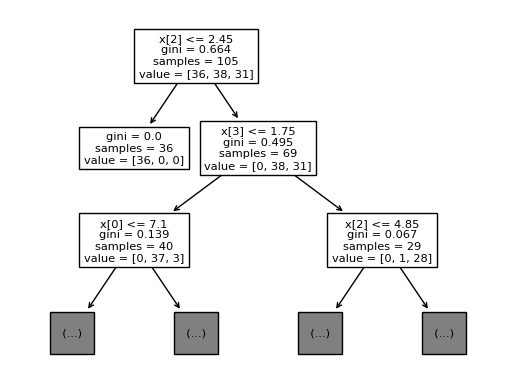

In [54]:
from sklearn import tree

tree.plot_tree(clf, max_depth=2)

In [66]:
from sklearn.tree import export_graphviz
from graphviz import Source

#This produces a Graphviz file
export_graphviz(clf,
                out_file='./data/iris_tree.dot',
                feature_names= df_iris_feature_names,
                class_names= df_iris_class_names,
                rounded=True,
                filled=True)

## Multiclass Classification